# Web Scraping 

In [1]:
# Scrape site Function that grabs content, date, title and leaning 
import newspaper
from newspaper import Article
import pickle
import pandas as pd

def scrapeSite(url, leaning):
    site = newspaper.build(url, memoize_articles=False)
    content = []
    for a in site.articles:
        st = Article(a.url)
        try:
            st.download()
            st.parse()
            content.append({'content': st.text,
                            'date': st.publish_date,
                            'title': st.title,
                            'leaning': leaning})
        except:
            continue
    return content

In [51]:
#url parser from chatgpt
from urllib.parse import urlparse

def extract_site_name(url):
    # Parse the URL
    parsed_url = urlparse(url)
    
    # Get the netloc which contains the domain or site name
    site_name = parsed_url.netloc
    
    # Remove www. if present
    if site_name.startswith("www."):
        site_name = site_name[4:]
    
    # Remove the top-level domain
    site_name_parts = site_name.split('.')
    if len(site_name_parts) > 1:
        site_name = site_name_parts[0]
    
    return site_name

In [8]:
right = pd.read_csv('right_news_websites.csv')
left = pd.read_csv('left_news_websites.csv')
center = pd.read_csv('center_news_websites.csv')

In [18]:
for i in range(len(right)):
    content = scrapeSite(right.site[i], right.leaning[i])
    with open(f'data/articles/{extract_site_name(right.site[i])}.pkl', 'wb') as f:
        pickle.dump(content, f)
    print(f'Site {right.site[i]} scraped')

Site https://www.breitbart.com/ scraped
Site https://www.dailymail.co.uk/ scraped
Site https://www.foxnews.com/ scraped
Site https://www.nationalreview.com/ scraped
Site https://nypost.com/ scraped
Site https://reason.com/ scraped
Site https://spectator.org/ scraped
Site https://www.theblaze.com/ scraped
Site https://dailycaller.com/ scraped
Site https://www.dailywire.com/ scraped
Site https://www.theepochtimes.com/ scraped
Site https://thefederalist.com/ scraped
Site https://www.wsj.com/news/opinion scraped
Site https://www.washingtonexaminer.com/ scraped
Site https://freebeacon.com/ scraped


In [21]:
for i in range(len(left)):
    content = scrapeSite(left.site[i], left.leaning[i])
    with open(f'data/articles/{extract_site_name(left.site[i])}.pkl', 'wb') as f:
        pickle.dump(content, f)
    print(f'Site {left.site[i]} scraped')

Site https://abcnews.go.com/ scraped
Site https://apnews.com/ scraped
Site https://www.axios.com/ scraped
Site https://www.bloomberg.com/ scraped
Site https://www.buzzfeednews.com/ scraped
Site https://www.cbsnews.com/ scraped
Site https://www.cnn.com/ scraped
Site https://www.thedailybeast.com/ scraped
Site https://www.democracynow.org/ scraped
Site https://www.huffpost.com/ scraped
Site https://www.insider.com/ scraped
Site https://www.msnbc.com/ scraped
Site https://www.nbcnews.com/ scraped


Building prefix dict from /Users/ibrahimkhanani/opt/anaconda3/lib/python3.9/site-packages/jieba/dict.txt ...
Dumping model to file cache /var/folders/jv/km021z5n17l9p3z53v1_w2dh0000gn/T/jieba.cache
Loading model cost 1.2051758766174316 seconds.
Prefix dict has been built succesfully.


Site https://www.nytimes.com/ scraped
Site https://www.npr.org/ scraped
Site https://www.politico.com/ scraped
Site https://slate.com/ scraped
Site https://www.theatlantic.com/ scraped
Site https://www.economist.com/ scraped
Site https://www.theguardian.com/ scraped
Site https://theintercept.com/ scraped
Site https://www.newyorker.com/ scraped
Site https://time.com/ scraped
Site https://www.usatoday.com/ scraped
Site https://www.vox.com/ scraped
Site https://www.washingtonpost.com/ scraped


In [ ]:
for i in range(len(center)):
    content = scrapeSite(center.site[i], center.leaning[i])
    with open(f'data/articles/{extract_site_name(center.site[i])}.pkl', 'wb') as f:
        pickle.dump(content, f)
    print(f'Site {center.site[i]} scraped')

# Load Data

In [2]:
import os
import numpy as np

def retrieveData(path):
    articles = []
    leanings = []
    files = os.listdir(path)
    for f in files:
        newpath = os.path.join(path, f)
        with open(newpath, 'rb') as o:
            try:
                art = pickle.load(o)
                for t in art:
                    articles.append(t['content'])
                    leanings.append(t['leaning'])
            except:
                continue
    return articles, leanings

In [3]:
X, y = retrieveData('data/articles')
X = np.asarray(X)

In [5]:
data_left = []
data_right = []
for i in range(len(y)):
    if y[i] == -2:
        data_left.append(X[i])
    elif y[i] == 2:
        data_right.append(X[i])

# Sentement Analysis 

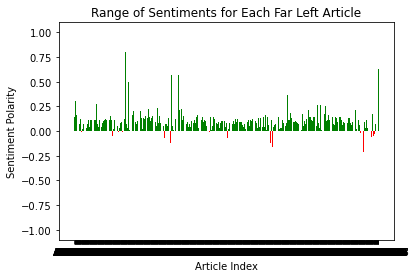

In [163]:
from textblob import TextBlob
import matplotlib.pyplot as plt
sentiments_left = []
sentiments_right = []

for article in data_left:
    blob = TextBlob(article)
    polarity = blob.sentiment.polarity
    sentiments_left.append(polarity)
    
for article in data_right:
    blob = TextBlob(article)
    polarity = blob.sentiment.polarity
    sentiments_right.append(polarity)

# Create a bar chart to visualize the range of sentiments
article_indices = np.arange(len(data_left))
plt.bar(article_indices, sentiments_left, color=['green' if sentiment > 0 else 'red' if sentiment < 0 else 'gray' for sentiment in sentiments_left])
plt.xlabel('Article Index')
plt.ylabel('Sentiment Polarity')
plt.title('Range of Sentiments for Each Far Left Article')
plt.xticks(article_indices, [f'Article {i+1}' for i in range(len(data_left))])
plt.show()

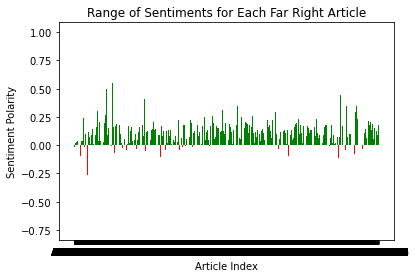

In [164]:
article_indices = np.arange(len(data_right))
plt.bar(article_indices, sentiments_right, color=['green' if sentiment > 0 else 'red' if sentiment < 0 else 'gray' for sentiment in sentiments_right])
plt.xlabel('Article Index')
plt.ylabel('Sentiment Polarity')
plt.title('Range of Sentiments for Each Far Right Article')
plt.xticks(article_indices, [f'Article {i+1}' for i in range(len(data_right))])
plt.show()

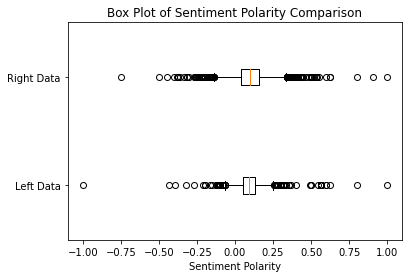

In [109]:
# Calculate sentiment polarity for each article
sentiments_left = [TextBlob(article).sentiment.polarity for article in data_left]
sentiments_right = [TextBlob(article).sentiment.polarity for article in data_right]

#side-by-side box plot
plt.boxplot([sentiments_left, sentiments_right], vert=False, showfliers=True, labels=['Left Data', 'Right Data'])

plt.xlabel('Sentiment Polarity')
plt.title('Box Plot of Sentiment Polarity Comparison')

plt.show()

# Commonly used words and phrases

In [6]:
# Get the most commonly used Phrases 

from nltk import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
# Tokenize the articles into words

all_words = [word for article in X for word in word_tokenize(article)]
all_words_left = [word for article in data_left for word in word_tokenize(article)]
all_words_right = [word for article in data_right for word in word_tokenize(article)]

n = 3

# Generate n-grams from all words
ngrams_list = list(ngrams(all_words, n))
ngrams_list_left = list(ngrams(all_words_left, n))
ngrams_list_right = list(ngrams(all_words_right, n))

# Count the frequency of each n-gram
ngrams_frequency = Counter(ngrams_list)
ngrams_frequency_left = Counter(ngrams_list_left)
ngrams_frequency_right = Counter(ngrams_list_right)

# Get Top Phrases
top_phrases_count = 100000

top_phrases = ngrams_frequency.most_common(top_phrases_count)
top_phrases_left = ngrams_frequency_left.most_common(top_phrases_count)
top_phrases_right = ngrams_frequency_right.most_common(top_phrases_count)


In [7]:
# Count accurances of phrases in an article. 
def count_phrases_in_articles(articles, phrases):
    phrase_counts = {phrase.lower(): 0 for phrase in phrases}

    for article in articles:
        # Tokenize the article
        article = article.lower()
        
        # Iterate through each phrase and count occurrences
        for phrase in phrases:
            # Count occurrences of the phrase in the article
            the_count = article.count(phrase.lower())
            
            # Update the count in the dictionary
            phrase_counts[phrase.lower()] += the_count

    return phrase_counts

In [8]:
political_issues = [
     'Taxation',
    'Government spending',
    'Economic inequality',
    'Trade policies',
    'Universal healthcare',
    'Affordable healthcare',
    'Access to medical services',
    'Education funding',
    'School choice',
    'Higher education affordability',
    'Climate change',
    'Conservation',
    'Renewable energy',
    'Civil rights',
    'LGBTQ rights',
    'Racial equality',
    'International relations',
    'Diplomacy',
    'Military intervention',
    'Border control',
    'Immigration reform',
    'Refugee policies',
    'Police reform',
    'Prison system reform',
    'Death penalty',
    'Counterterrorism',
    'Cybersecurity',
    'Defense spending',
    'Internet regulations',
    'Data privacy',
    'Surveillance laws',
    'Welfare programs',
    'Social Security',
    'Unemployment benefits',
    'Second Amendment rights',
    'Gun regulations',
    'Background checks',
    'Affordable housing',
    'Homelessness',
    'Housing policies',
    'Transportation',
    'Energy infrastructure',
    'Public works projects',
    'Minimum wage',
    "Workers' rights",  
    'Employment regulations'
]
conspiracy_related_words = [
    "Conspiracy Theory",
    "Cover-up",
    "False Flag",
    "Mind Control",
    "New World Order (NWO)",
    "Chemtrails",
    "Illuminati",
    "Deep State",
    "Hoax",
    "False Information",
    "Disinformation",
    "Censorship"
]
conspiracy_theory_words = [
    'Cover-up',
    'Secretive',
    'Shadowy',
    'Manipulation',
    'Hidden agenda',
    'Covert',
    'Clandestine',
    'Secrecy',
    'Propaganda',
    'Mysterious',
    'Concealed',
    'Deception',
    'Unseen forces',
    'Government plot',
    'Illuminati',
    'New World Order',
    'Mind control',
    'False flag',
    'Alien abductions',
    'Chemtrails',
    'Area 51',
    'Roswell',
    'UFO sightings',
    'Deep state',
    'Global conspiracy',
    'Censorship',
    'Black ops',
    'Crisis actors',
    'Hoax',
    'False information',
    'Manipulative elites',
    'Skepticism',
    'Paranoia',
    'NWO',
    'Agenda 21',
    'Reptilian overlords',
    'Mind-manipulating technology',
    'Big Brother',
    'Surveillance state',
    'Nazi moon base',
    'Faked moon landing',
    'Rogue agents',
    'Mind-altering substances',
    'Mass surveillance',
    'HAARP',
    'Satanic rituals',
    'Mind-control experiments',
    'Autonomous weapons',
    'Project MKUltra',
    'False reality',
    'Subliminal messages',
    'Mind-reading technology',
    'Cabal',
    'Remote viewing',
    'Secret societies',
    'Nefarious',
    'Disinformation',
    'Conspiratorial',
    'Conspiracy theorist',
    'Hidden truths',
    'Manipulative media',
    'Coercion',
    'Mind-expanding drugs',
    'The Deep Web',
    'CIA experiments',
    'Mind control experiments',
    'Mind-altering frequencies',
    'Project Blue Beam',
    'Global manipulation',
    'Chemical trails',
    'Mind-washing',
    'New Age conspiracies',
    'Hidden knowledge',
    'Mind games',
    'Psychotronic weapons',
    'Mind-bending',
    'Mind hackers',
    'Mind programming',
    'Brainwashing',
    'Subversive',
    'Mind-influencing',
    'Mind-boggling',
    'Mind-reading',
    'Mind-probing',
    'Mind-twisting',
    'Mind-bending',
    'Mind-expanding'
]

politically_relevant_keywords = ["election", "government", "policy", "politics", "congress", "president", "democracy", "legislation", "campaign", "vote", "joe", "biden", "Donald", "Trump",
                                    "government", "politics", "election", "democracy", "policy", "legislation",
    "congress", "president", "senate", "house", "vote", "ballot", "campaign",
    "candidate", "partisan", "bipartisan", "constituency", "representative",
    "constituent", "lobbyist", "corruption", "scandal", "diplomacy",
    "foreign policy", "domestic policy", "civil rights", "human rights",
    "freedom", "justice", "equality", "liberty", "security",
    "national security", "defense", "military", "war", "peace",
    "negotiation", "compromise", "legislative", "executive", "judicial",
    "constitution", "amendment", "federal", "state", "local", "tax",
    "budget", "deficit", "surplus", "debt", "revenue", "spending",
    "socialism", "capitalism", "democratic", "republican", "liberal",
    "conservative", "progressive", "populist", "authoritarian",
    "totalitarian", "anarchist", "activist", "protest", "demonstration",
    "rally", "policyholder", "left-wing", "right-wing", "centrist",
    "ideology", "ideological", "fundamentalist", "revolution",
    "opposition", "regime", "dictatorship", "autocracy", "oligarchy",
    "monarchy", "coalition", "separation of powers", "checks and balances",
    "presidential", "parliamentary", "cabinet", "minister", "ambassador",
    "diplomat", "coup", "impeachment", "veto", "referendum", "poll", "polling",
    "electorate", "constituency", "political party", "third party", "primary",
    "caucus", "electoral college", "gerrymandering", "redistricting",
    "ballot box", "political science", "political philosophy",
    "political theory", "political analyst", "political commentator",
    "spin", "propaganda", "fake news", "media bias", "freedom of the press",
    "press conference", "public opinion", "grassroots", "citizenship",
    "suffrage", "civil servant", "bureaucracy", "public administration",
    "political correctness", "lobbying", "special interest",
    "political action committee (PAC)", "interest group", "town hall",
    "constituent", "political asylum", "political exile", "statecraft",
    "détente", "political stability", "political instability", "tradition",
    "sovereignty", "populism", "nationalism", "isolationism", "patriotism", "protestantism", "separation of church and state",
    "electoral system", "electoral reform", "political ideology", "political movement", "political discourse", 
    "public policy", "civic engagement", "activism", "political agenda", "government transparency", "accountability", 
    "political spectrum", "political polarization", "voter turnout", "political participation", "grassroots movement", 
    "political party platform", "political rhetoric", "policy advocacy", "public service", "social justice", "welfare state", 
    "humanitarianism", "economic policy", "trade agreements", "tariffs", "isolationism", "national debt", "monetary policy", 
    "central bank", "income inequality", "wealth distribution", "class struggle", "social mobility", "affirmative action", 
    "social programs", "government intervention", "regulatory framework", "judicial review", "legal precedent", "rule of law", 
    "constitutional rights", "freedom of speech", "freedom of assembly", "privacy rights", "judicial independence", 
    "political correctness", "identity politics", "cultural war", "civil liberties", "social conservatism", "individualism", 
    "collectivism", "political economy", "political philosophy", "political strategy", "political theory", "political history", 
    "policy analysis", "public opinion polling", "political communication", "campaign strategy", "political advertising", 
    "political fundraising", "political campaign", "political consultant", "political endorsement", "political donation", 
    "political commentator", "political pundit", "political satire", "political cartoon", "political journalism", 
    "political correspondent", "political interview", "political debate", "political commentator", "political analyst", 
    "political theory", "political philosophy", "political scientist", "political research", "political survey", 
    "political affiliation", "political process", "political discourse", "political landscape", "political arena", 
    "political climate", "political development", "political theory", "political reform", "political revolution", 
    "political stability", "political unrest", "political transition", "political leadership", "political agenda", 
    "political movement", "political campaign", "political party", "political organization", "political figure"

current_events = ["Ukraine war", "conflict resolution", "geopolitics", "international relations", "war crimes", "humanitarian crisis", 
    "displacement", "refugee crisis", "ceasefire", "peacekeeping", "diplomatic efforts", "negotiation", 
    "security council", "UN intervention", "foreign affairs", "international diplomacy", "NATO", "sanctions", 
    "peace talks", "war-torn", "border dispute", "military intervention", "martial law", "proxy war", 
    "armed forces", "military strategy", "intelligence agencies", "cyber warfare", "information warfare", 
    "hybrid warfare", "asymmetric warfare", "human rights violations", "political refugees", "war effort", 
    "war powers", "defense budget", "military-industrial complex", "alliance", "treaty", "peace agreement", 
    "crisis management", "UN resolution", "non-proliferation", "security policy", "strategic alliances", 
    "coalition forces", "war zone", "peacekeeping mission", "frontline", "military occupation", 
    "humanitarian aid", "UNESCO", "Nuremberg principles", "war tribunal", "international law", 
    "Geneva Conventions", "war and society", "war economy", "war journalism", "war propaganda", 
    "war photography", "war correspondents", "war memorials", "war veterans", "homefront", 
    "wartime leadership", "wartime propaganda", "wartime atrocities", "wartime refugees", "wartime memories", 
    "wartime diplomacy", "wartime alliances", "wartime treaties", "wartime reconstruction", "war on terror", 
    "counterinsurgency", "foreign policy challenges", "geopolitical tensions", "world affairs", "international cooperation", 
    "crisis response", "humanitarian intervention", "conflict zones", "combat operations", "strategic objectives", 
    "security challenges", "peace enforcement", "peacebuilding", "conflict resolution mechanisms", "war diplomacy", 
    "war powers act", "cybersecurity threats", "economic sanctions", "humanitarian response", "regional stability", 
    "geopolitical landscape", "global security", "regional conflicts", "diplomatic dialogue", "crisis diplomacy"
]


In [20]:
right_political_issues = count_phrases_in_articles(data_right,politically_relevant_keywords )

In [21]:
left_political_issues = count_phrases_in_articles(data_left, politically_relevant_keywords)

In [22]:
print(right_political_issues)

{'election': 1516, 'government': 4012, 'policy': 938, 'politics': 552, 'congress': 472, 'president': 2524, 'democracy': 116, 'legislation': 262, 'campaign': 1570, 'vote': 2914, 'joe': 610, 'biden': 1155, 'donald': 303, 'trump': 759, 'senate': 152, 'house': 4613, 'ballot': 68, 'candidate': 214, 'partisan': 71, 'bipartisan': 22, 'constituency': 30, 'representative': 147, 'constituent': 22, 'lobbyist': 1, 'corruption': 55, 'scandal': 152, 'diplomacy': 13, 'foreign policy': 33, 'domestic policy': 1, 'civil rights': 27, 'human rights': 141, 'freedom': 268, 'justice': 474, 'equality': 62, 'liberty': 69, 'security': 703, 'national security': 51, 'defense': 166, 'military': 481, 'war': 8069, 'peace': 392, 'negotiation': 108, 'compromise': 60, 'legislative': 32, 'executive': 453, 'judicial': 38, 'constitution': 130, 'amendment': 123, 'federal': 424, 'state': 4133, 'local': 1470, 'tax': 1837, 'budget': 480, 'deficit': 64, 'surplus': 21, 'debt': 302, 'revenue': 151, 'spending': 496, 'socialism': 

In [140]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# Word Cloud generation 

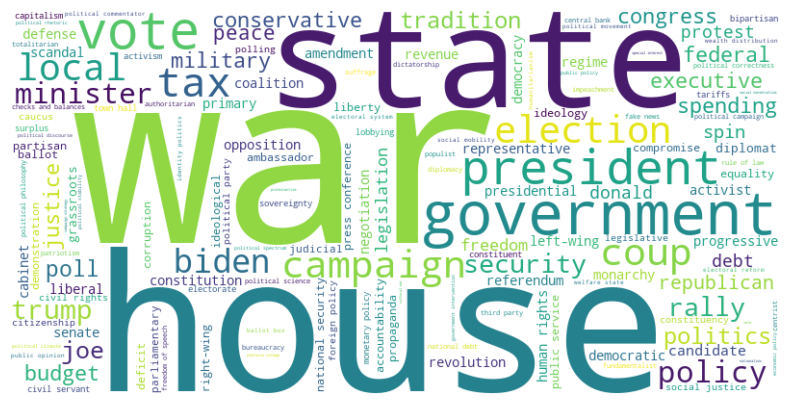

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(right_political_issues)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# Filter out phrases that don't contain any politically relevant keywords
politically_relevant_phrases = [(phrase, count) for phrase, count in top_phrases_left if any(keyword in phrase for keyword in politically_relevant_keywords)]

# Sort the filtered list by count in descending order
sorted_politically_relevant_phrases = sorted(politically_relevant_phrases, key=lambda x: x[1], reverse=True)

# Get the top 5 politically relevant phrases
top_5_politically_relevant_phrases = sorted_politically_relevant_phrases
# Print the top politically relevant phrases
for phrase, count in top_5_politically_relevant_phrases:
    print(f"Phrase: {phrase}, Count: {count}")
    

Phrase: ('Trump', '’', 's'), Count: 289
Phrase: ('state', '’', 's'), Count: 154
Phrase: ('the', 'state', '’'), Count: 120
Phrase: ('the', 'federal', 'government'), Count: 101
Phrase: ('government', '’', 's'), Count: 78
Phrase: ('the', 'state', 'of'), Count: 75
Phrase: ('of', 'the', 'state'), Count: 74
Phrase: ('in', 'the', 'state'), Count: 57
Phrase: ('the', 'Israeli', 'government'), Count: 52
Phrase: ('the', 'former', 'president'), Count: 49
Phrase: (',', 'the', 'state'), Count: 46
Phrase: ('President', 'Donald', 'Trump'), Count: 42
Phrase: ('president', '’', 's'), Count: 41
Phrase: ('the', '2020', 'election'), Count: 40
Phrase: ('Donald', 'Trump', '’'), Count: 37
Phrase: ('government', ',', 'and'), Count: 36
Phrase: ('the', 'government', '’'), Count: 34
Phrase: ('president', 'of', 'the'), Count: 34
Phrase: ('of', 'Trump', '’'), Count: 33
Phrase: ('of', 'the', 'war'), Count: 33
Phrase: ('.', 'Trump', '’'), Count: 32
Phrase: ('Donald', 'Trump', ','), Count: 31
Phrase: ('the', 'war', '.

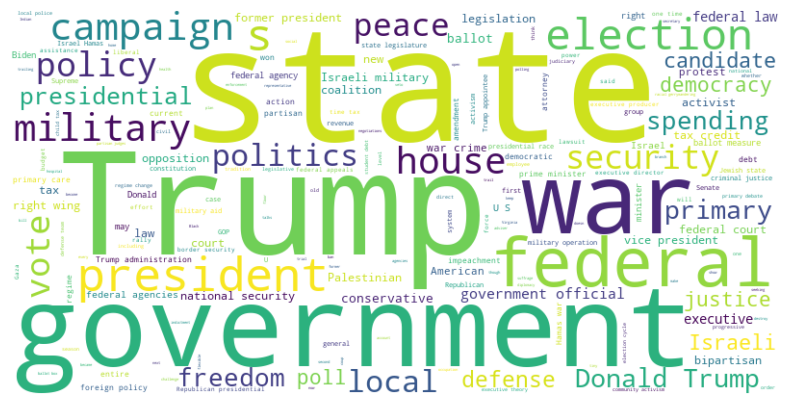

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(' '.join(phrase) for phrase, _ in top_5_politically_relevant_phrases)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# NN Training and Analysis 

In [2]:
tweetdf = pd.read_csv('ExtractedTweets.csv')

In [3]:
tweetdf.head(10)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
5,Democrat,RepDarrenSoto,RT @EmgageActionFL: Thank you to all who came ...
6,Democrat,RepDarrenSoto,Hurricane Maria left approx $90 billion in dam...
7,Democrat,RepDarrenSoto,RT @Tharryry: I am delighted that @RepDarrenSo...
8,Democrat,RepDarrenSoto,RT @HispanicCaucus: Trump's anti-immigrant pol...
9,Democrat,RepDarrenSoto,RT @RepStephMurphy: Great joining @WeAreUnidos...


In [146]:
y_model = [-1 if x == -2 else 1 if x == 2 else x for x in y]
y_model = np.asarray(y_model)

In [21]:
tweetX = tweetdf.Tweet
tweety = tweetdf.Party
tweety = [-1 if x == 'Democrat' else 1 for x in tweety]

In [27]:
#model trained only on tweets
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(np.asarray(tweetX), np.asarray(tweety), test_size=0.2, random_state=42)

y_train_mod = [label + 1 for label in y_train]
y_test_mod = [label + 1 for label in y_test]

count_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train).toarray()
X_test_bow = count_vectorizer.transform(X_test).toarray()

model = Sequential()
model.add(Dense(128, input_shape=(X_train_bow.shape[1],), activation='relu'))
#need high dropout to avoid overfitting
model.add(Dropout(0.9))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(np.asarray(X_train_bow), np.asarray(y_train_mod), epochs=5, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test_bow)
predicted_labels = tf.argmax(predictions, axis=1)

predictions = predicted_labels.numpy()

accuracy = accuracy_score(y_test_mod, predictions)
report = classification_report(y_test_mod, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Epoch 1/5
1730/1730 [==============================] - 11s 6ms/step - loss: 0.6469 - accuracy: 0.6321 - val_loss: 0.5306 - val_accuracy: 0.7323
Epoch 2/5
1730/1730 [==============================] - 10s 6ms/step - loss: 0.5488 - accuracy: 0.7109 - val_loss: 0.4963 - val_accuracy: 0.7495
Epoch 3/5
1730/1730 [==============================] - 9s 5ms/step - loss: 0.5183 - accuracy: 0.7345 - val_loss: 0.4826 - val_accuracy: 0.7586
Epoch 4/5
1730/1730 [==============================] - 9s 5ms/step - loss: 0.4934 - accuracy: 0.7491 - val_loss: 0.4728 - val_accuracy: 0.7641
Epoch 5/5
541/541 [==============================] - 1s 1ms/step
Accuracy: 0.7620865139949109
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      8506
           2       0.76      0.78      0.77      8786

    accuracy                           0.76     17292
   macro avg       0.76      0.76      0.76     17292
weighted avg       0.76      0.76    

In [49]:
#model trained on only articles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_mod = [label + 1 for label in y_train]
y_test_mod = [label + 1 for label in y_test]

count_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train).toarray()
X_test_bow = count_vectorizer.transform(X_test).toarray()

model = Sequential()
model.add(Dense(128, input_shape=(X_train_bow.shape[1],), activation='relu'))
#need high dropout to avoid overfitting
model.add(Dropout(0.7))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(np.asarray(X_train_bow), np.asarray(y_train_mod), epochs=5, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test_bow)
predicted_labels = tf.argmax(predictions, axis=1)

predictions = predicted_labels.numpy()

accuracy = accuracy_score(y_test_mod, predictions)
report = classification_report(y_test_mod, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Epoch 1/5
289/289 [==============================] - 3s 7ms/step - loss: 0.8544 - accuracy: 0.6601 - val_loss: 0.5782 - val_accuracy: 0.7763
Epoch 2/5
289/289 [==============================] - 2s 6ms/step - loss: 0.5583 - accuracy: 0.7804 - val_loss: 0.4855 - val_accuracy: 0.8299
Epoch 3/5
289/289 [==============================] - 2s 5ms/step - loss: 0.4844 - accuracy: 0.8296 - val_loss: 0.4544 - val_accuracy: 0.8416
Epoch 4/5
289/289 [==============================] - 3s 9ms/step - loss: 0.3795 - accuracy: 0.8601 - val_loss: 0.4762 - val_accuracy: 0.8438
Epoch 5/5
91/91 [==============================] - 0s 2ms/step
Accuracy: 0.8663897542402216
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1261
           1       0.95      0.43      0.59       134
           2       0.86      0.92      0.89      1494

    accuracy                           0.87      2889
   macro avg       0.89      0.73      0.78      

In [147]:
#model trained both on tweets and articles

nptweetX = np.asarray(tweetX)
nptweety = np.asarray(tweety)

fullX = np.concatenate((nptweetX, X))
fully = np.concatenate((nptweety, y_model))
X_train, X_test, y_train, y_test = train_test_split(np.asarray(fullX), np.asarray(fully), test_size=0.2, random_state=42)

y_train_mod = [label + 1 for label in y_train]
y_test_mod = [label + 1 for label in y_test]

count_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train).toarray()
X_test_bow = count_vectorizer.transform(X_test).toarray()

model = Sequential()
model.add(Dense(128, input_shape=(X_train_bow.shape[1],), activation='relu'))
#need high dropout to avoid overfitting
model.add(Dropout(0.7))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(np.asarray(X_train_bow), np.asarray(y_train_mod), epochs=5, batch_size=32, validation_split=0.2, verbose=1)

predictions = model.predict(X_test_bow)
predicted_labels = tf.argmax(predictions, axis=1)

predictions = predicted_labels.numpy()

accuracy = accuracy_score(y_test_mod, predictions)
report = classification_report(y_test_mod, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)



Epoch 1/5
2019/2019 [==============================] - 14s 7ms/step - loss: 0.6731 - accuracy: 0.6555 - val_loss: 0.5753 - val_accuracy: 0.7105
Epoch 2/5
2019/2019 [==============================] - 13s 6ms/step - loss: 0.5746 - accuracy: 0.7140 - val_loss: 0.5543 - val_accuracy: 0.7189
Epoch 3/5
2019/2019 [==============================] - 10s 5ms/step - loss: 0.5391 - accuracy: 0.7345 - val_loss: 0.5470 - val_accuracy: 0.7222
Epoch 4/5
2019/2019 [==============================] - 10s 5ms/step - loss: 0.5025 - accuracy: 0.7531 - val_loss: 0.5421 - val_accuracy: 0.7286
Epoch 5/5
631/631 [==============================] - 1s 1ms/step
Accuracy: 0.7348000594618701
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      9740
           1       1.00      0.24      0.39       125
           2       0.75      0.74      0.74     10316

    accuracy                           0.73     20181
   macro avg       0.82      0.57  

In [148]:
def predict_leaning(text, model, count_vectorizer):

    text_array = np.asarray([text])
    text_bow = count_vectorizer.transform(text_array).toarray()

    predictions = model.predict(text_bow)
    predicted_label = np.argmax(predictions)

    return predicted_label

In [161]:
test = X_test[0]
print(predict_leaning(test, model, count_vectorizer))

1/1 [==============================] - 0s 72ms/step
0


In [162]:
print(y_test[0])

-1
